### Importación de datos



In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [2]:
tienda4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358 entries, 0 to 2357
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2358 non-null   object 
 1   Categoría del Producto  2358 non-null   object 
 2   Precio                  2358 non-null   float64
 3   Costo de envío          2358 non-null   float64
 4   Fecha de Compra         2358 non-null   object 
 5   Vendedor                2358 non-null   object 
 6   Lugar de Compra         2358 non-null   object 
 7   Calificación            2358 non-null   int64  
 8   Método de pago          2358 non-null   object 
 9   Cantidad de cuotas      2358 non-null   int64  
 10  lat                     2358 non-null   float64
 11  lon                     2358 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.2+ KB


#1. Análisis de facturación



**Descripción**

En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [105]:
suma_tienda_1=tienda['Precio'].sum()
suma_tienda_1

suma_tienda_2=tienda2['Precio'].sum()
suma_tienda_2

suma_tienda_3=tienda3['Precio'].sum()
suma_tienda_3

suma_tienda_4=tienda4['Precio'].sum()
suma_tienda_4

''' Esto solo lo use para probar otra forma de ver los resultados de la suma y compararlo con el df hecho en el siguiente codigo
print(f'Tienda 1:, {suma_tienda_1}')
print(f'Tienda 2:, {suma_tienda_2}')
print(f'Tienda 3:, {suma_tienda_3}')
print(f'Tienda 4:, {suma_tienda_4}')
'''


Tienda 1:, 1150880400.0
Tienda 2:, 1116343500.0
Tienda 3:, 1098019600.0
Tienda 4:, 1038375700.0


In [78]:
resumen_ingreso = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingreso total': [suma_tienda_1, suma_tienda_2, suma_tienda_3, suma_tienda_4]
})

resumen_ingreso


,Tienda,Ingreso total
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


## Gráfico

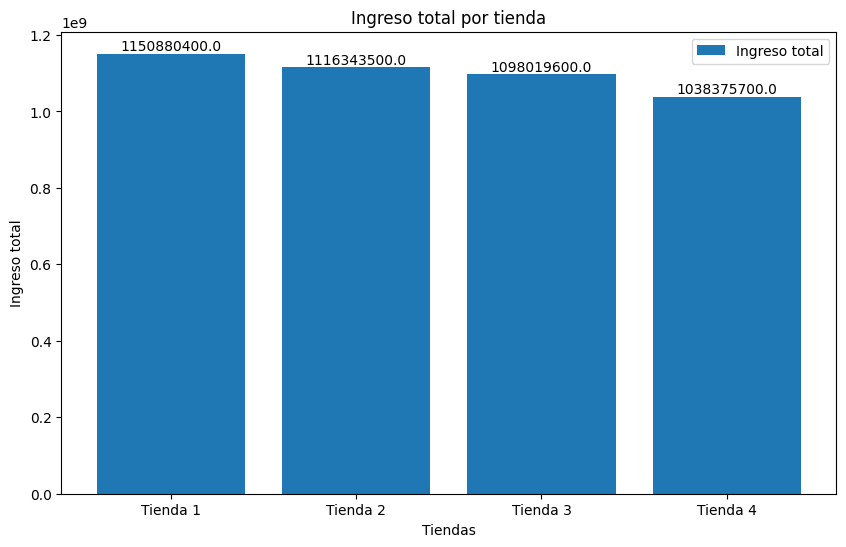

In [73]:

i = 0
plt.figure(figsize=(10, 6))

plt.bar(
    resumen_ingreso['Tienda'],
    resumen_ingreso['Ingreso total'],
    label='Ingreso total'
)

plt.xlabel('Tiendas')
plt.ylabel('Ingreso total')
plt.title('Ingreso total por tienda')

for valor in resumen_ingreso['Ingreso total']:
    plt.text(i, valor, f'{valor}', ha='center', va='bottom')
    i += 1
plt.legend()
plt.show()

La tienda con mayor ingresos fue la **Tienda 1**, con un ingreso de **$ 1150880400**

# 2. Ventas por categoría

**Descripción**

En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [80]:
# Hallando el total de filas y columnas de cada tienda, para evitar errores

len_tienda1=tienda.shape
len_tienda2=tienda2.shape
len_tienda3=tienda3.shape
len_tienda4=tienda4.shape


2359

In [6]:
tamaño_tienda=pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingreso total': [len_tienda1, len_tienda2, len_tienda3, len_tienda4]
})

tamaño_tienda

,Tienda,Ingreso total
0,Tienda 1,"(2359, 12)"
1,Tienda 2,"(2359, 12)"
2,Tienda 3,"(2359, 12)"
3,Tienda 4,"(2358, 12)"


In [7]:
venta_producto_tienda1=tienda['Categoría del Producto'].value_counts()

venta_producto_tienda2=tienda2['Categoría del Producto'].value_counts()

venta_producto_tienda3=tienda3['Categoría del Producto'].value_counts()

venta_producto_tienda4=tienda4['Categoría del Producto'].value_counts()



In [8]:
resumen_categoria = pd.DataFrame({
    'Tienda 1': venta_producto_tienda1,
    'Tienda 2': venta_producto_tienda2,
    'Tienda 3': venta_producto_tienda3,
    'Tienda 4': venta_producto_tienda4
})

resumen_categoria

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Artículos para el hogar,171,181,177,201
Deportes y diversión,284,275,277,277
Electrodomésticos,312,305,278,254
Electrónicos,448,422,451,451
Instrumentos musicales,182,224,177,170
Juguetes,324,313,315,338
Libros,173,197,185,187
Muebles,465,442,499,480


### Gráfico

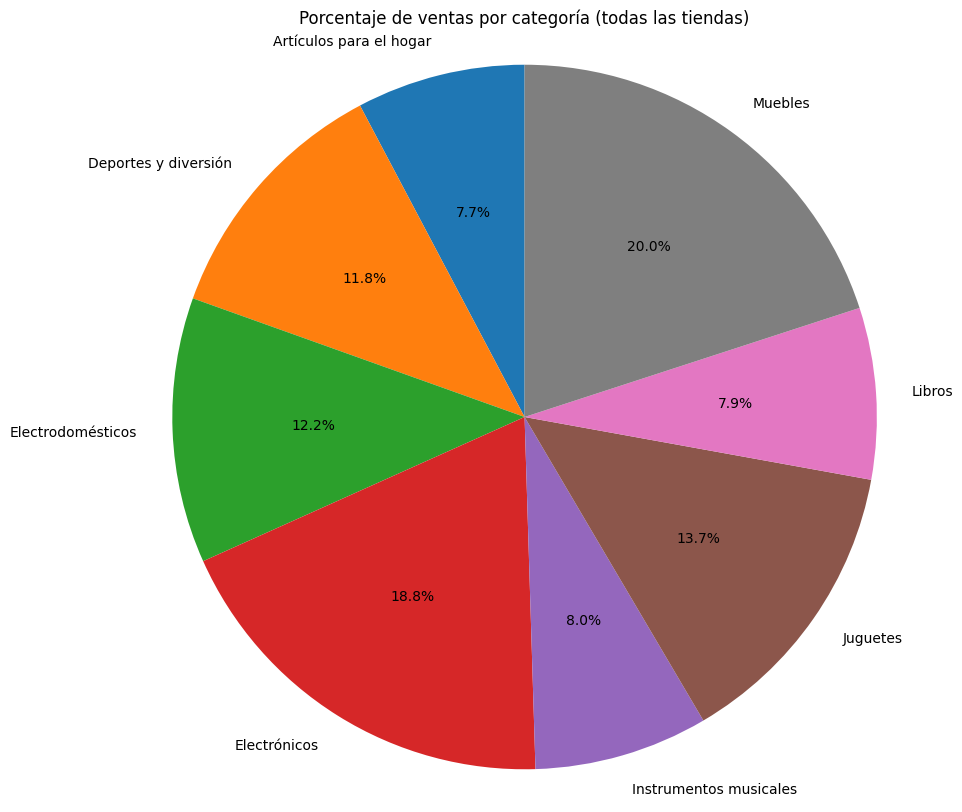

In [26]:
total_categorias = resumen_categoria.sum(axis=1)

plt.figure(figsize=(10, 10))

plt.pie(
    total_categorias.values,
    labels=total_categorias.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Porcentaje de ventas por categoría (todas las tiendas)')
plt.axis('equal')
plt.show()

Las categorias **más vendidas** en todas las tiendas **fueron Muebles y Electronicos.**

Las categorias **menos vendidas** en todas las tiendas fueron **Artículos para el hogar y Instrumentos musicales.**

# 3. Calificación promedio de la tienda


**Descripción**

En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [9]:
calificacion_tienda1=tienda['Calificación'].mean()
calificacion_tienda2=tienda2['Calificación'].mean()
calificacion_tienda3=tienda3['Calificación'].mean()
calificacion_tienda4=tienda4['Calificación'].mean()

In [29]:
calificacion_por_tienda=pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Calificacion promedio': [calificacion_tienda1, calificacion_tienda2, calificacion_tienda3, calificacion_tienda4]
})

calificacion_por_tienda

,Tienda,Calificacion promedio
0,Tienda 1,3.976685
1,Tienda 2,4.037304
2,Tienda 3,4.048326
3,Tienda 4,3.995759


### Gráfico

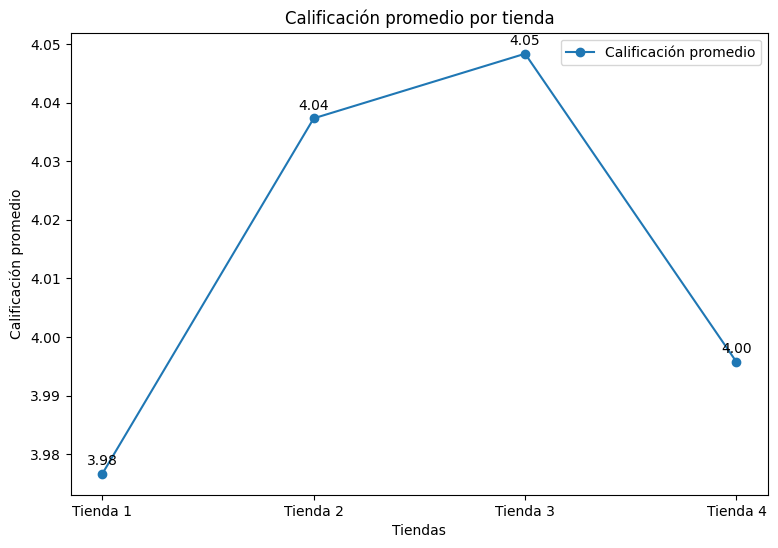

In [71]:
plt.figure(figsize=(9,6))

plt.plot(
    calificacion_por_tienda['Tienda'],
    calificacion_por_tienda['Calificacion promedio'],
    marker='o',
    label='Calificación promedio'
)

plt.xlabel('Tiendas')
plt.ylabel('Calificación promedio')
plt.title('Calificación promedio por tienda')

i = 0

for valor in calificacion_por_tienda['Calificacion promedio']:
    plt.text(i, valor + 0.001, f'{valor:.2f}', ha='center', va='bottom')
    i += 1
plt.legend()
plt.show()

Las tiendas **más valoradas** fueron **Tienda 2 y Tienda 3**, con un puntaje promedio de **4,04 y 4,05** respectivamente

# 4. Productos más y menos vendidos

**Descripción**

En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [11]:
#Verifico si hay productos sin valor

tienda['Producto'].isna().sum()

np.int64(0)

In [12]:
#Prueba para verificar funcionalidad
productos_mas_vendidos_tienda1 = tienda.groupby('Producto').size().sort_values(ascending=False).head(5)
productos_mas_vendidos_tienda1

,0
Producto,
Armario,60
TV LED UHD 4K,60
Microondas,60
Secadora de ropa,58
Mesa de noche,56


In [13]:
#Para tienda 1
productos_mas_vendidos_tienda1 = tienda.groupby('Producto').size().sort_values(ascending=False).head(5)
productos_menos_vendidos_tienda1 = tienda.groupby('Producto').size().sort_values(ascending=False).tail(5)
#Para tienda 2
productos_mas_vendidos_tienda2 = tienda2.groupby('Producto').size().sort_values(ascending=False).head(5)
productos_menos_vendidos_tienda2 = tienda2.groupby('Producto').size().sort_values(ascending=False).tail(5)
# Para tienda 3
productos_mas_vendidos_tienda3 = tienda3.groupby('Producto').size().sort_values(ascending=False).head(5)
productos_menos_vendidos_tienda3 = tienda3.groupby('Producto').size().sort_values(ascending=False).tail(5)
# Para tienda 4
productos_mas_vendidos_tienda4 = tienda4.groupby('Producto').size().sort_values(ascending=False).head(5)
productos_menos_vendidos_tienda4 = tienda4.groupby('Producto').size().sort_values(ascending=False).tail(5)

In [14]:
print('-------------------Para tienda 1-----------------')
print(f'Los productos más vendidos son: {productos_mas_vendidos_tienda1}')
print(f'Los productos menos vendidos son: {productos_menos_vendidos_tienda1}')
print('-------------------Para tienda 2-----------------')
print(f'Los productos más vendidos son: {productos_mas_vendidos_tienda2}')
print(f'Los productos menos vendidos son: {productos_menos_vendidos_tienda2}')
print('-------------------Para tienda 3-----------------')
print(f'Los productos más vendidos son: {productos_mas_vendidos_tienda3}')
print(f'Los productos menos vendidos son: {productos_menos_vendidos_tienda3}')
print('-------------------Para tienda 4-----------------')
print(f'Los productos más vendidos son: {productos_mas_vendidos_tienda4}')
print(f'Los productos menos vendidos son: {productos_menos_vendidos_tienda4}')

-------------------Para tienda 1-----------------
Los productos más vendidos son: Producto
Armario             60
TV LED UHD 4K       60
Microondas          60
Secadora de ropa    58
Mesa de noche       56
dtype: int64
Los productos menos vendidos son: Producto
Mochila                      39
Pandereta                    36
Olla de presión              35
Celular ABXY                 33
Auriculares con micrófono    33
dtype: int64
-------------------Para tienda 2-----------------
Los productos más vendidos son: Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Pandereta                    58
Guitarra acústica            58
dtype: int64
Los productos menos vendidos son: Producto
Auriculares        37
Sillón             35
Impresora          34
Mesa de comedor    34
Juego de mesa      32
dtype: int64
-------------------Para tienda 3-----------------
Los productos más vendidos son: Producto
Kit de bancas      57
Mesa de comedor    56


### Gráfico

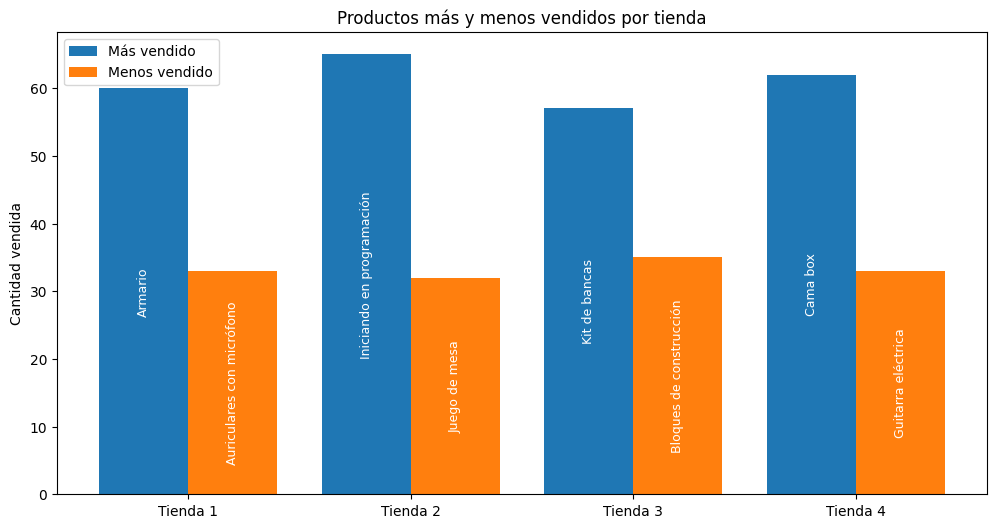

In [76]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

mas_vendidos = [
    productos_mas_vendidos_tienda1.iloc[0],
    productos_mas_vendidos_tienda2.iloc[0],
    productos_mas_vendidos_tienda3.iloc[0],
    productos_mas_vendidos_tienda4.iloc[0]
]

menos_vendidos = [
    productos_menos_vendidos_tienda1.iloc[4],
    productos_menos_vendidos_tienda2.iloc[4],
    productos_menos_vendidos_tienda3.iloc[4],
    productos_menos_vendidos_tienda4.iloc[4]
]

nombres_mas = [
    productos_mas_vendidos_tienda1.index[0],
    productos_mas_vendidos_tienda2.index[0],
    productos_mas_vendidos_tienda3.index[0],
    productos_mas_vendidos_tienda4.index[0]
]

nombres_menos = [
    productos_menos_vendidos_tienda1.index[4],
    productos_menos_vendidos_tienda2.index[4],
    productos_menos_vendidos_tienda3.index[4],
    productos_menos_vendidos_tienda4.index[4]
]

x = np.arange(len(tiendas))
ancho = 0.40

plt.figure(figsize=(12, 6))

barras_mas = plt.bar(x - ancho/2,mas_vendidos,ancho,label='Más vendido')

barras_menos = plt.bar(x + ancho/2,menos_vendidos,ancho,label='Menos vendido')

plt.xticks(x, tiendas)
plt.ylabel('Cantidad vendida')
plt.title('Productos más y menos vendidos por tienda')
plt.legend()

for i, barra in enumerate(barras_mas):
    plt.text(
        barra.get_x() + barra.get_width()/2,
        barra.get_height()/2,
        nombres_mas[i],
        ha='center',
        va='center',
        color='white',
        fontsize=9,
        rotation=90
    )

for i, barra in enumerate(barras_menos):
    plt.text(
        barra.get_x() + barra.get_width()/2,
        barra.get_height()/2,
        nombres_menos[i],
        ha='center',
        va='center',
        color='white',
        fontsize=9,
        rotation=90
    )
plt.show()

**Tienda 1**

En la Tienda 1, los productos más vendidos fueron Armario, TV LED UHD 4K y Microondas, cada uno con 60 ventas, liderando el ranking de popularidad. El producto menos vendido fue Auriculares con micrófono, con 33 ventas

---


**Tienda 2**

En la Tienda 2, el productos más vendidos fue Iniciando en programación con 65 ventas. El producto menos vendido fue Juegos de mesa con 32 ventas.

---


**Tienda 3**

En la Tienda 3, el producto más vendido fue el Kit de bancas, con 57 ventas, seguido muy de cerca por Mesa de comedor y Cama king. El producto menos vendido fue Bloques de construcción, con 35 ventas.

---


**Tienda 4**

En la Tienda 4, el producto más vendido fue la Cama box, con 62 ventas, destacándose sobre los demás. El producto menos vendido fue la Guitarra eléctrica, con 33 ventas.

---

# 5. Envío promedio por tienda

**Descripción**

En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.  Sabiendo que el cliente paga el envío.

In [15]:
prom_envio_tienda1 = tienda['Costo de envío'].mean()
prom_envio_tienda2 = tienda2['Costo de envío'].mean()
prom_envio_tienda3 = tienda3['Costo de envío'].mean()
prom_envio_tienda4 = tienda4['Costo de envío'].mean()

In [16]:
promedio_envio = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Costo de envío promedio': [
        prom_envio_tienda1,
        prom_envio_tienda2,
        prom_envio_tienda3,
        prom_envio_tienda4
    ]
})

promedio_envio

,Tienda,Costo de envío promedio
0,Tienda 1,26018.609580
1,Tienda 2,25216.235693
2,Tienda 3,24805.680373
3,Tienda 4,23459.457167


### Gráfico

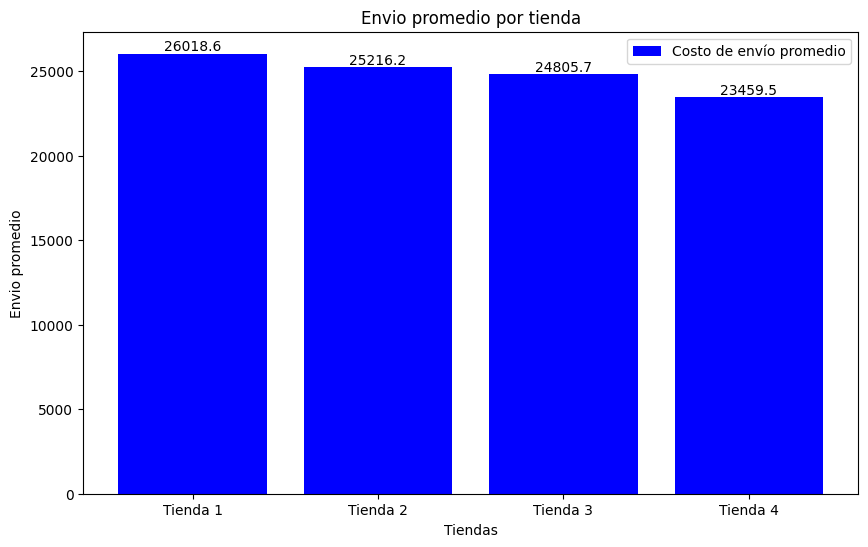

In [69]:

i = 0
plt.figure(figsize=(10, 6))

plt.bar(
    promedio_envio['Tienda'],
    promedio_envio['Costo de envío promedio'],
    color='blue',
    label='Costo de envío promedio'
)

plt.xlabel('Tiendas')
plt.ylabel('Envio promedio')
plt.title('Envio promedio por tienda')

for valor in promedio_envio['Costo de envío promedio']:
    plt.text(i, valor, f'{valor:.1f}', ha='center', va='bottom')
    i += 1
plt.legend()
plt.show()

El costo promedio de envío **más caro** en todas las tiendas fue el de la **Tienda 1** con **$26018,6**

El costo promedio de envío **menos caro** en todas las tiendas fue el de la **Tienda 4** con **$23459,5**

# 6. Analisís del desempeño geográfico

### Gráfico

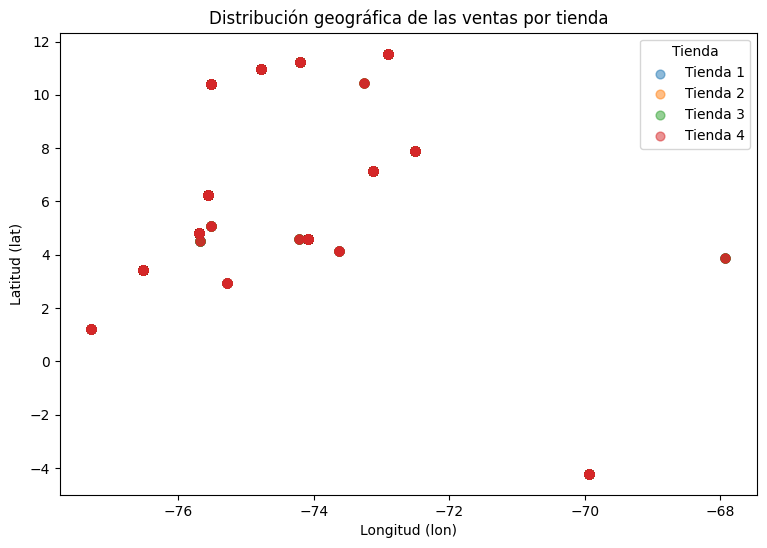

In [103]:
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

df_geo = pd.concat( [tienda, tienda2, tienda3, tienda4], ignore_index=True )

plt.figure(figsize=(9, 6))

for nombre_tienda, datos in df_geo.groupby('Tienda'):
  plt.scatter( datos['lon'], # eje X
              datos['lat'], # eje Y
               alpha=0.5,
               s=40,
               label=nombre_tienda
  )
plt.xlabel('Longitud (lon)')
plt.ylabel('Latitud (lat)')
plt.title('Distribución geográfica de las ventas por tienda')
plt.legend(title='Tienda')

plt.show()

Existe una alta concentración de puntos en la zona comprendida aproximadamente entre: **Longitudes -76 a -73 y Latitudes 4 a 12**

Esta zona representa el principal foco de ventas, donde operan varias tiendas.

# **Informe General**

**Introducción**

Este informe analiza el desempeño de cuatro tiendas diferentes, tomando en cuenta factores clave como los ingresos totales, las ventas por categoría, las calificaciones promedio de los clientes, los productos más y menos vendidos, y el costo promedio de envío. El objetivo es ofrecer al Sr. Juan una recomendación clara, basada en datos reales, sobre cuál de estas tiendas sería la mejor opción para comercializar sus productos, optimizando su rendimiento, aumentando las probabilidades de éxito en el mercado y facilitando la toma de decisiones estratégicas a futuro.

**Analizar Ingresos Totales por Tienda**

A continuación, se presentan los ingresos totales calculados para cada tienda:

*   Tienda 1: 1,150,880,400
*   Tienda 2: 1,116,343,500
*   Tienda 3: 1,098,019,600
*   Tienda 4: 1,038,375,700

**La Tienda 1 generó el mayor ingreso total, con $1,150,880,400.**

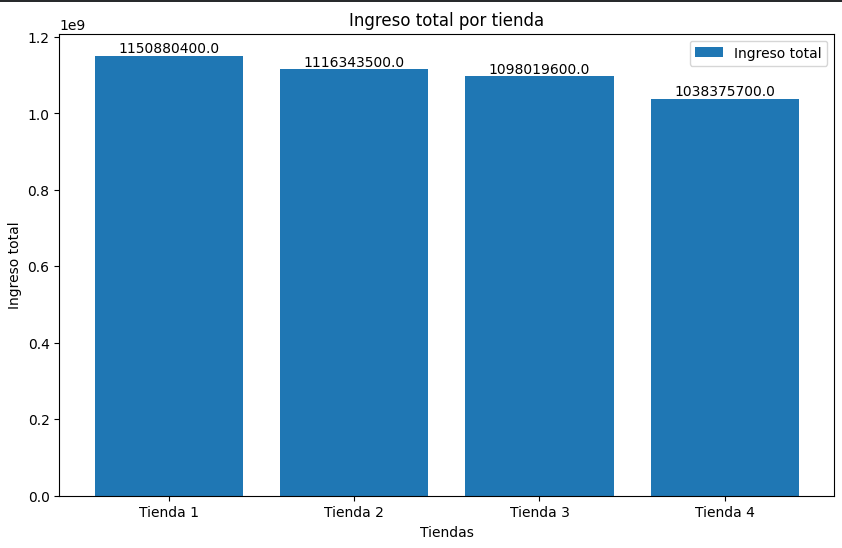

---



**Analizar Ventas por Categoría**

El análisis de ventas por categoría y el gráfico circular muestra que las categorías con mayores ventas en todas las tiendas son:

*   Muebles (20.0%)
*   Electrónicos (18.8%)
*   Juguetes (13.7%)


Las categorías con menores ventas en todas las tiendas son:

*   Artículos para el hogar (7.7%)
*   Libros (7.9%)
*   Instrumentos musicales (8.0%)


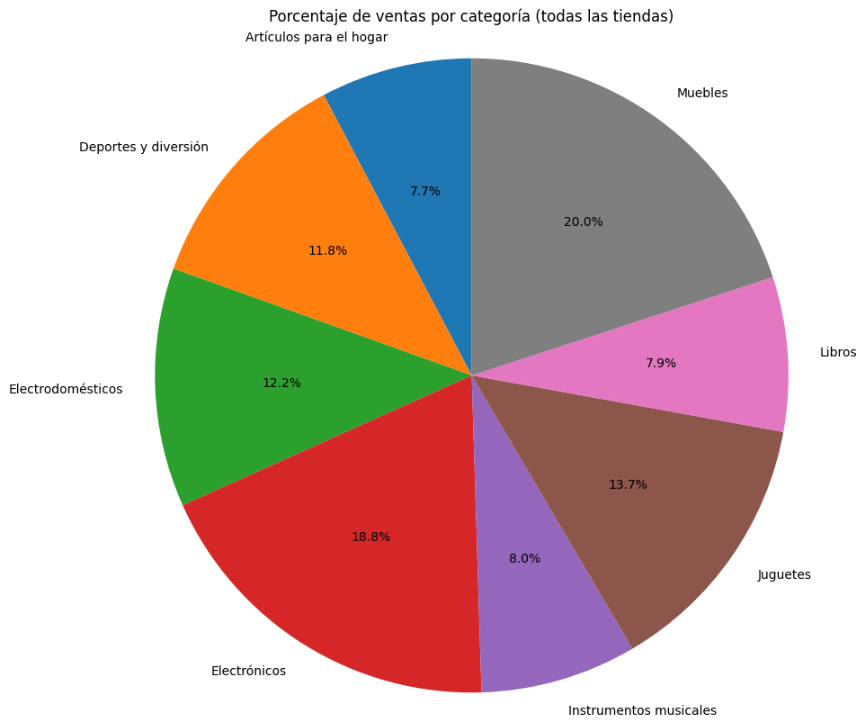


---

**Análisis de Calificaciones Promedio por Tienda**

Las calificaciones promedio de los clientes para cada tienda, fueron los siguientes:

*   Tienda 1: 3.98
*   Tienda 2: 4.04
*   Tienda 3: 4.05
*   Tienda 4: 4.00

Las tiendas más valoradas fueron Tienda 2 y Tienda 3, con un puntaje promedio de 4,04 y 4,05 respectivamente.

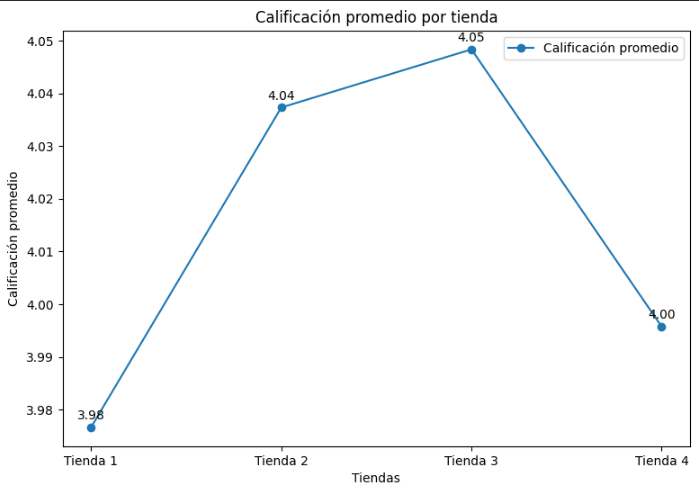


---

**Productos Más y Menos Vendidos por Tienda**

El producto más y menos vendido para cada una de las cuatro tiendas, junto con sus respectivas cantidades, fueron las siguientes:

**Tienda 1:**
*   Producto Más Vendido: Armario (60 ventas)
*   Producto Menos Vendido: Auriculares con micrófono (33 ventas)

**Tienda 2:**
*   Producto Más Vendido: Iniciando en programación (65 ventas)
*   Producto Menos Vendido: Juego de mesa (32 ventas)

**Tienda 3:**
*   Producto Más Vendido: Kit de bancas (57 ventas)
*   Producto Menos Vendido: Bloques de construcción (35 ventas)

**Tienda 4:**
*   Producto Más Vendido: Cama box (62 ventas)
*   Producto Menos Vendido: Guitarra eléctrica (33 ventas)

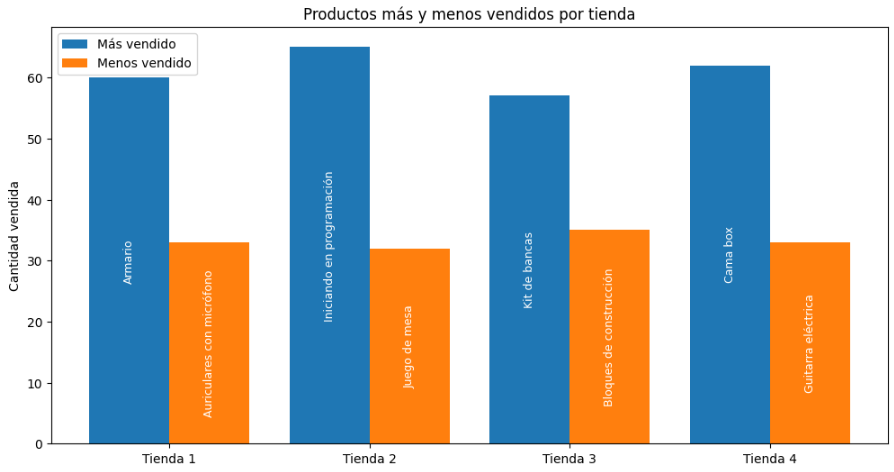



---




**Analisis Costo de Envío Promedio**

El costo de envío promedio para cada una de las tiendas es el siguiente:

*   Tienda 1 : 26018.61
*   Tienda 2 : 25216.24
*   Tienda 3 : 24805.68
*   Tienda 4 : 23459.46


El costo de envio promedio de envío más bajo en todas las tiendas fue el de la Tienda 1 con $26018,6.

El costo de envio promedio de envío más alto en todas las tiendas fue el de la Tienda 1 con $26018,6.

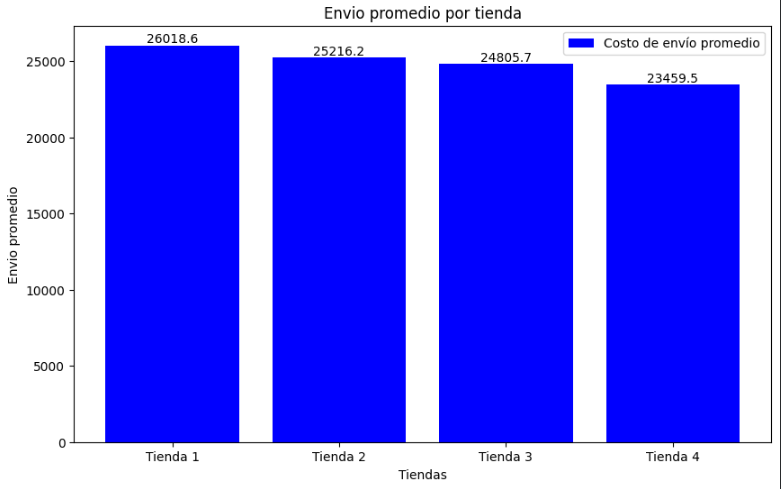




---



# **Recomendaciones y Conclusiones**

**Justificación:**

*   La Tienda 1 es la opción más recomendable para que el Sr. Juan comercialice sus productos, ya que genera el mayor ingreso total (1,150,880,400) y tiene ventas sólidas en productos populares como el Armario, lo que asegura un volumen de ventas estable y consistente. Aunque su calificación promedio de clientes (3.98) es ligeramente inferior a la de las Tiendas 2 y 3, y su costo de envío (26,018.61) es el más alto, estos factores pueden gestionarse con estrategias de mejora en servicio al cliente y optimización de logística.

*   Por el contrario, la Tienda 4 sería la menos recomendable, ya que, a pesar de tener el costo de envío más bajo (23459.46) registra los ingresos más bajos (1,038,375,700) y sus productos más vendidos no generan un volumen comparable al de las otras tiendas. Esto indica un menor alcance y potencial de ventas, lo que podría limitar significativamente el impacto de los productos del Sr. Juan en el mercado.

*   Adicionalmente, las Tiendas 2 y 3 destacan por mayor satisfacción del cliente (4.04 y 4.05 respectivamente), lo que indica que podrían ser opciones complementarias para productos que requieran un alto nivel de fidelización del cliente, aunque sus ingresos son inferiores a los de la Tienda 1.


**Conclusiones:**

*   Se recomienda vender principalmente en la Tienda 1, buscando mejorar la satisfacción del cliente y optimizar el envío, mientras que la Tienda 4 debería evitarse por su bajo volumen de ventas y menor rendimiento general.

*   Las Tiendas 2 y 3 pueden considerarse para productos estratégicos que busquen una mayor aceptación del cliente y reputación de marca, aprovechando sus altas calificaciones promedio.

*   No se recomienda vender principalmente en la Tienda 4 debido a su bajo rendimiento general, ingresos limitados y productos con menor volumen de ventas, aunque su costo de envío es atractivo.


